In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from os import listdir
import os, fnmatch

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

%matplotlib inline

xl = pd.ExcelFile("data/city_coordinates.xlsx")
x2 = pd.ExcelFile("data/city_details.xlsx")

print(xl.sheet_names, x2.sheet_names)


['Cities (1)'] ['Sheet1']


In [2]:
cities = xl.parse("Cities (1)")
cities.head()

,ID,latitude,longitude
0,1,57.03,9.92
1,2,57.17,-2.08
2,3,63.35,18.83
3,4,36.99,35.32
4,5,39.00,-1.87


In [3]:
details = x2.parse("Sheet1")
details.head()

,ID,city,country,temperature
0,1,Aalborg,Denmark,7.52
1,2,Aberdeen,United Kingdom,8.10
2,3,Abisko,Sweden,0.20
3,4,Adana,Turkey,18.67
4,5,Albacete,Spain,12.62


In [4]:
merged = pd.merge(cities,details,left_on='ID',right_on='ID',how='left')
merged.head()

,ID,latitude,longitude,city,country,temperature
0,1,57.03,9.92,Aalborg,Denmark,7.52
1,2,57.17,-2.08,Aberdeen,United Kingdom,8.10
2,3,63.35,18.83,Abisko,Sweden,0.20
3,4,36.99,35.32,Adana,Turkey,18.67
4,5,39.00,-1.87,Albacete,Spain,12.62


In [5]:
def make_point(row):
    return Point(row['longitude'], row['latitude'])

# Go through every row, and make a point out of its lat and lon
points = merged.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
cityinfo = gpd.GeoDataFrame(merged, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
cityinfo.crs = {'init': 'epsg:4326'}

# Let's look at the first few
print(cityinfo['city'].unique())
cityinfo.head(10)

['Aalborg' 'Aberdeen' 'Abisko' 'Adana' 'Albacete' 'Algeciras' 'Amiens'
 'Amsterdam' 'Ancona' 'Andorra' 'Angers' 'Ankara' 'Antalya' 'Arad' 'Athens'
 'Augsburg' 'Bacau' 'Badajoz' 'Baia Mare' 'Balti' 'Barcelona' 'Bari'
 'Basel' 'Batman' 'Belfast' 'Belgrade' 'Bergamo' 'Bergen' 'Berlin'
 'Bialystok' 'Bielefeld' 'Bila Tserkva' 'Bilbao' 'Birmingham' 'Blackpool'
 'Bodo' 'Bologna' 'Bonn' 'Bordeaux' 'Botosani' 'Bournemouth' 'Bradford'
 'Braga' 'Braila' 'Bratislava' 'Bremen' 'Brest' 'Brno' 'Brugge' 'Bucharest'
 'Budapest' 'Burgas' 'Burgos' 'Bursa' 'Bydgoszcz' 'Bytom' 'Caen'
 'Cambridge' 'Cartagena' 'Catania' 'Chemnitz' 'Cherkasy' 'Chernihiv'
 'Chernivtsi' 'Chisinau' 'Constanta' 'Cork' 'Cosenza' 'Craiova'
 'Daugavpils' 'Debrecen' 'Denizli' 'Dijon' 'Dublin' 'Dundee' 'Edinburgh'
 'Edirne' 'Elbasan' 'Elblag' 'Erfurt' 'Erzincan' 'Erzurum' 'Eskisehir'
 'Exeter' 'Foggia' 'Frankfurt' 'Freiburg' 'Galway' 'Gaziantep' 'Geneva'
 'Genoa' 'Glasgow' 'GĆ¶teborg' 'Granada' 'Graz' 'Grenoble' 'Groningen'
 'Gyor' 'H

,ID,latitude,longitude,city,country,temperature,geometry
0,1,57.03,9.92,Aalborg,Denmark,7.52,POINT (9.92 57.03)
1,2,57.17,-2.08,Aberdeen,United Kingdom,8.10,POINT (-2.08 57.17)
2,3,63.35,18.83,Abisko,Sweden,0.20,POINT (18.83 63.35)
3,4,36.99,35.32,Adana,Turkey,18.67,POINT (35.32 36.99)
4,5,39.00,-1.87,Albacete,Spain,12.62,POINT (-1.87 39)
5,6,36.13,-5.47,Algeciras,Spain,17.38,POINT (-5.47 36.13)
6,7,49.90,2.30,Amiens,France,10.17,POINT (2.3 49.9)
7,8,52.35,4.92,Amsterdam,Netherlands,8.93,POINT (4.92 52.35)
8,9,43.60,13.50,Ancona,Italy,13.52,POINT (13.5 43.6)
9,10,42.50,1.52,Andorra,Andorra,9.60,POINT (1.52 42.5)


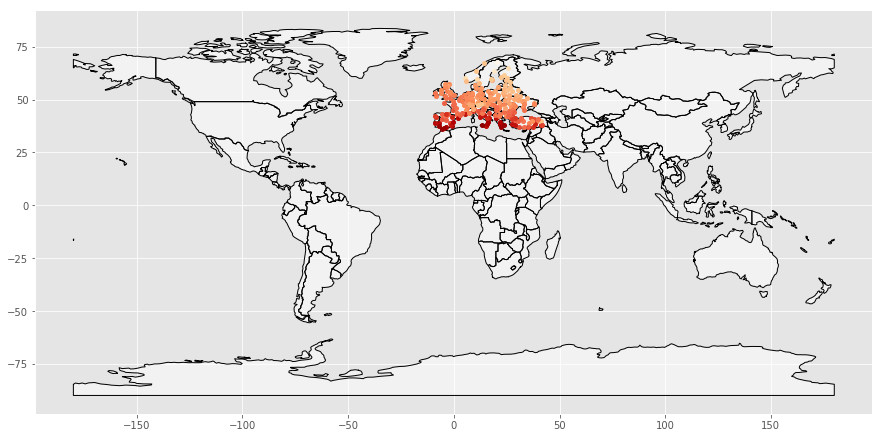

In [10]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

base = world.plot(color='white', edgecolor='black')

cityinfo.plot(ax=base, marker='o', column='temperature', cmap='OrRd', markersize=4);

In [11]:
cityinfo.to_file(driver = 'ESRI Shapefile', filename= 'cityinfo.shp')
# or directly
# cityinfo.to_file("cityinfo.shp")

In [13]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [12]:
# http://geojson.io/
cityinfo.to_file(driver='GeoJSON', filename= 'cityinfo.json')

ValueError: Null layer